In [80]:
#Imports
import numpy
import matplotlib as mpl
import pylab
import scipy.stats
%matplotlib inline

#Plot formatting stuff
font = {'family' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rc("savefig", dpi=400)

In [81]:
#The classic hbar c
LConv=197.*10**-9

In [82]:

#Energy resolution
Eres=lambda mi,mh: mh**2/(2*mi)

#Osc probability
OscProbYNew=lambda L,E,Eres,Y:0.861*numpy.sin((Y/(E**2.-Eres**2)*(L/LConv)))**2


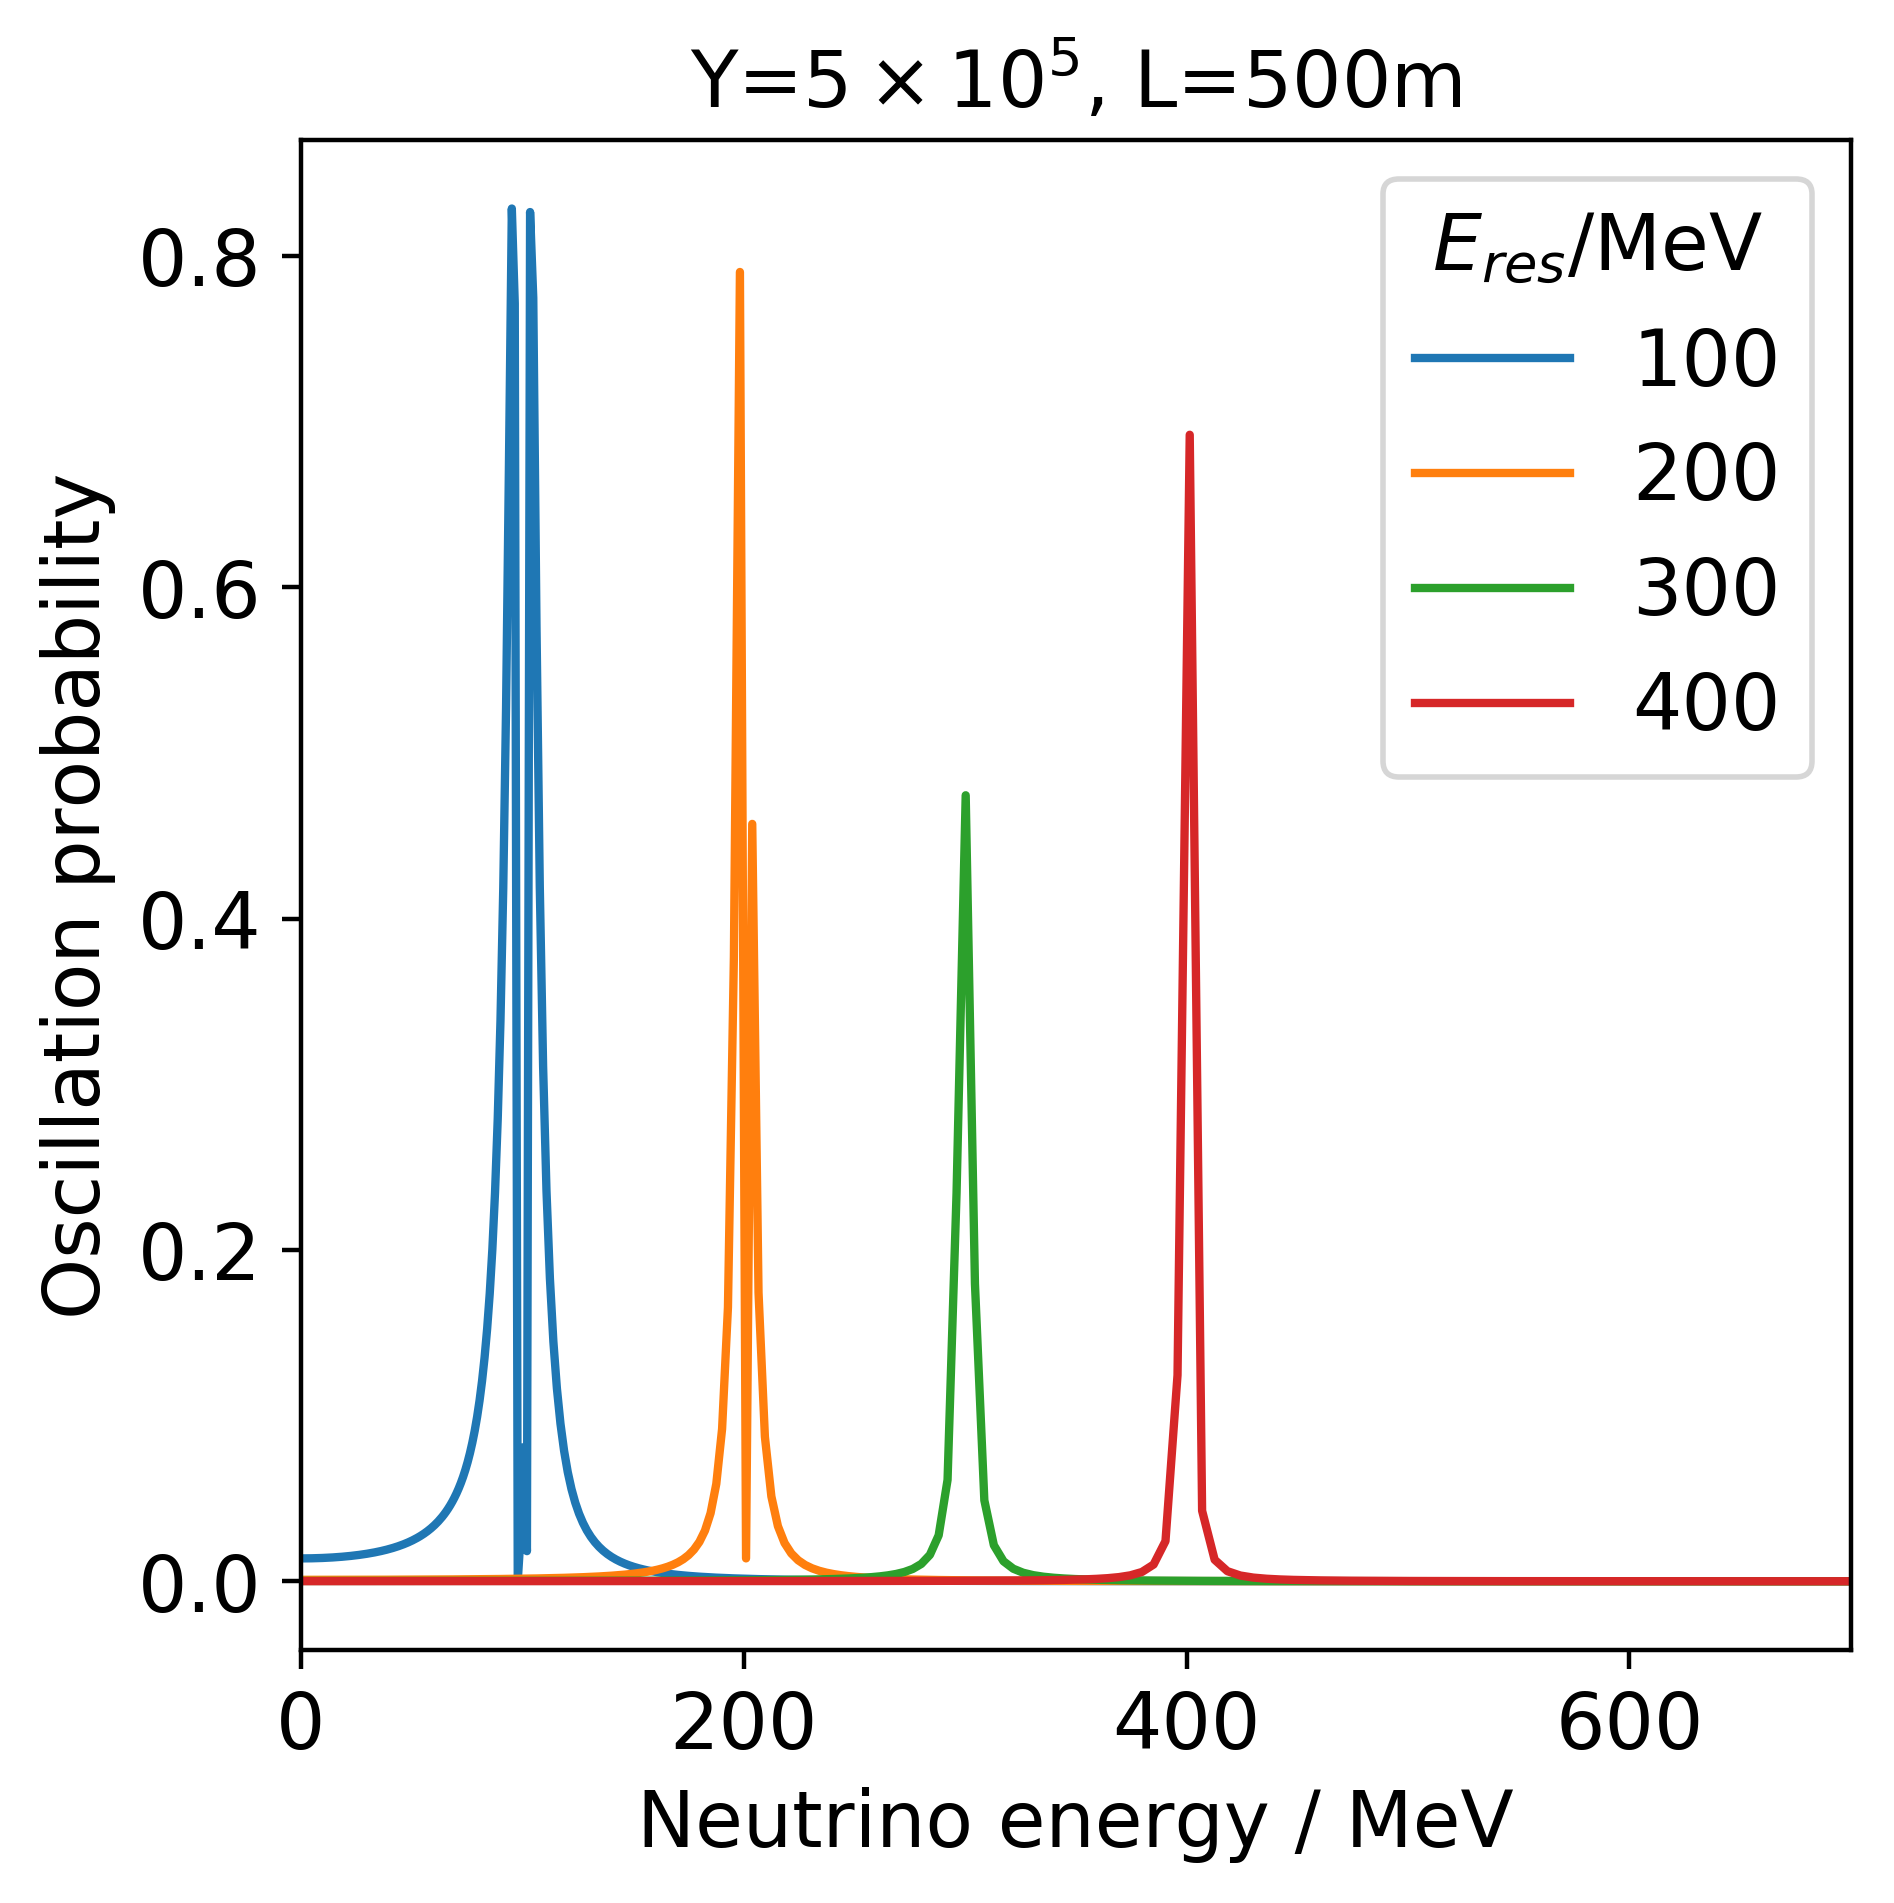

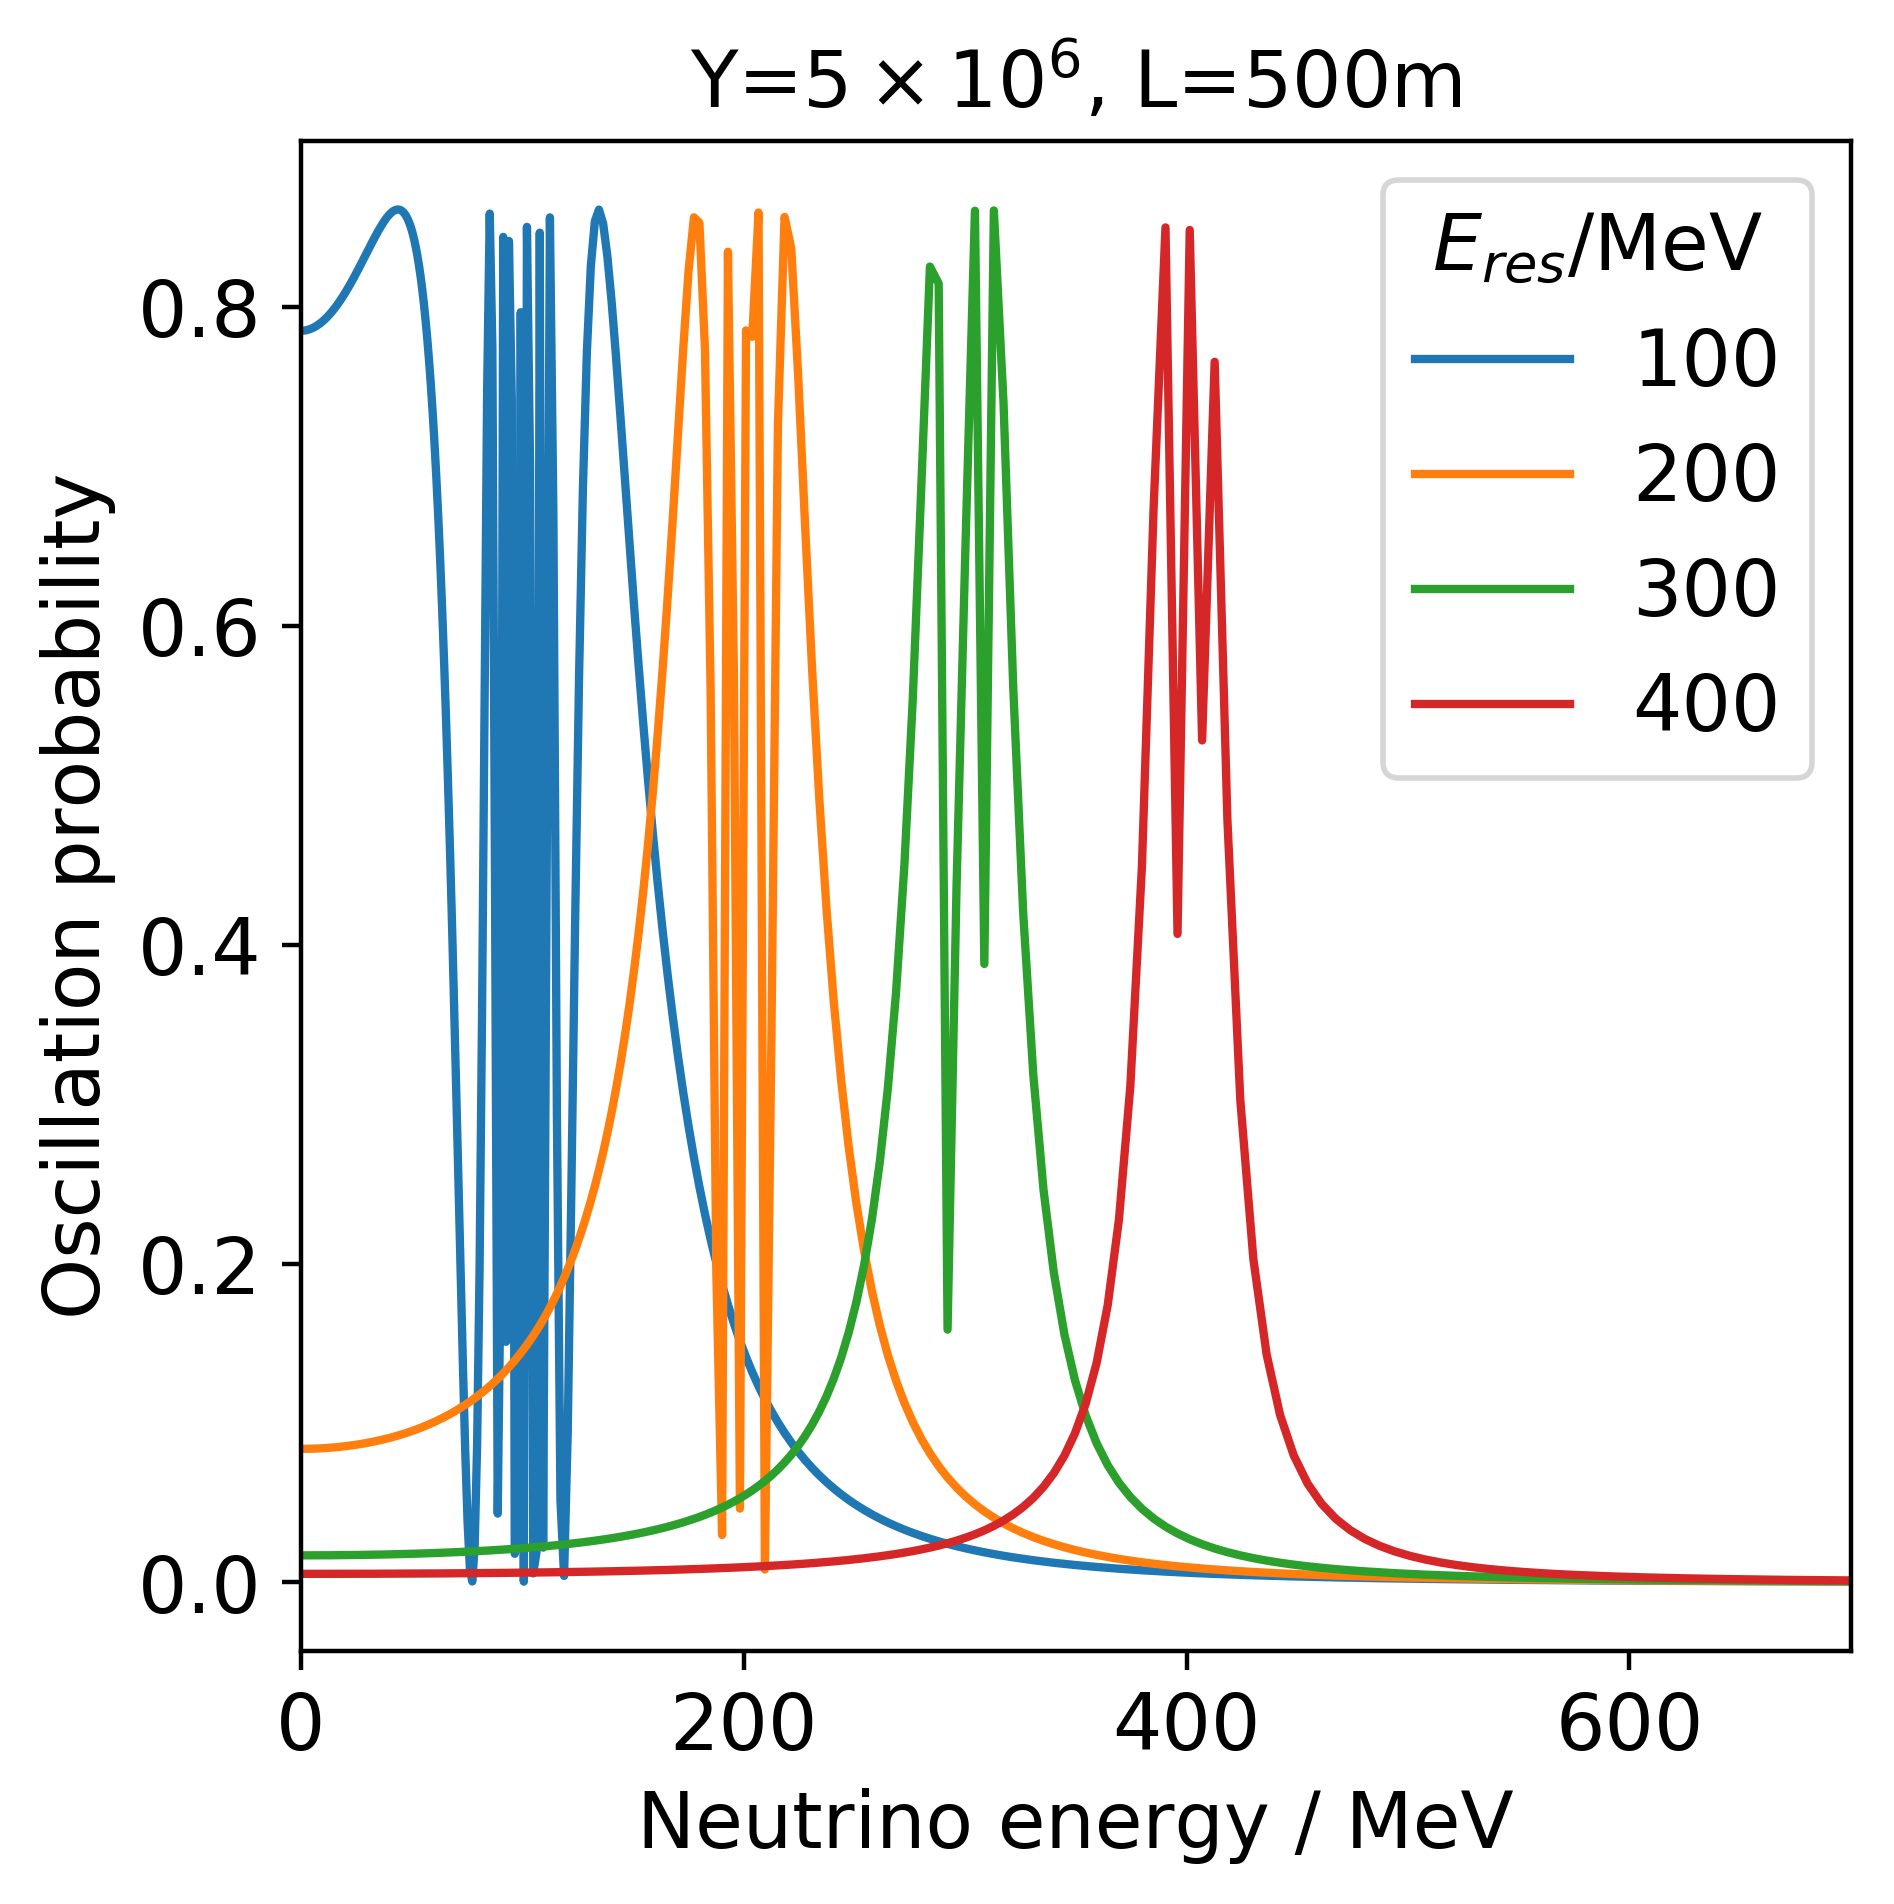

In [58]:
# Plot some osc probs
pylab.figure(figsize=(5,5))
vars=numpy.logspace(3,9,1000)
for i in range(100, 500, 100):
    pylab.plot(vars/1e6,OscProbYNew(500,vars,i*1e6,500000),label=str(i))
#pylab.semilogx()
pylab.xlim(0,700)
pylab.legend(title=r"$E_{res}$/MeV",fontsize=14)
pylab.xlabel("Neutrino energy / MeV")
pylab.ylabel("Oscillation probability")
pylab.title(r"Y=$5\times10^5$, L=500m",fontsize=14)
pylab.savefig("Example_Y5e5.png",dpi=200)
pylab.show()

pylab.figure(figsize=(5,5))
vars=numpy.logspace(3,9,1000)
for i in range(100, 500, 100):
    pylab.plot(vars/1e6,OscProbYNew(500,vars,i*1e6,5000000),label=str(i))
#pylab.semilogx()
pylab.xlim(0,700)
pylab.legend(title=r"$E_{res}$/MeV",fontsize=14)
pylab.xlabel("Neutrino energy / MeV")
pylab.ylabel("Oscillation probability")
pylab.title(r"Y=$5\times10^6$, L=500m",fontsize=14)
pylab.savefig("Example_Y5e6.png",dpi=200)
pylab.show()


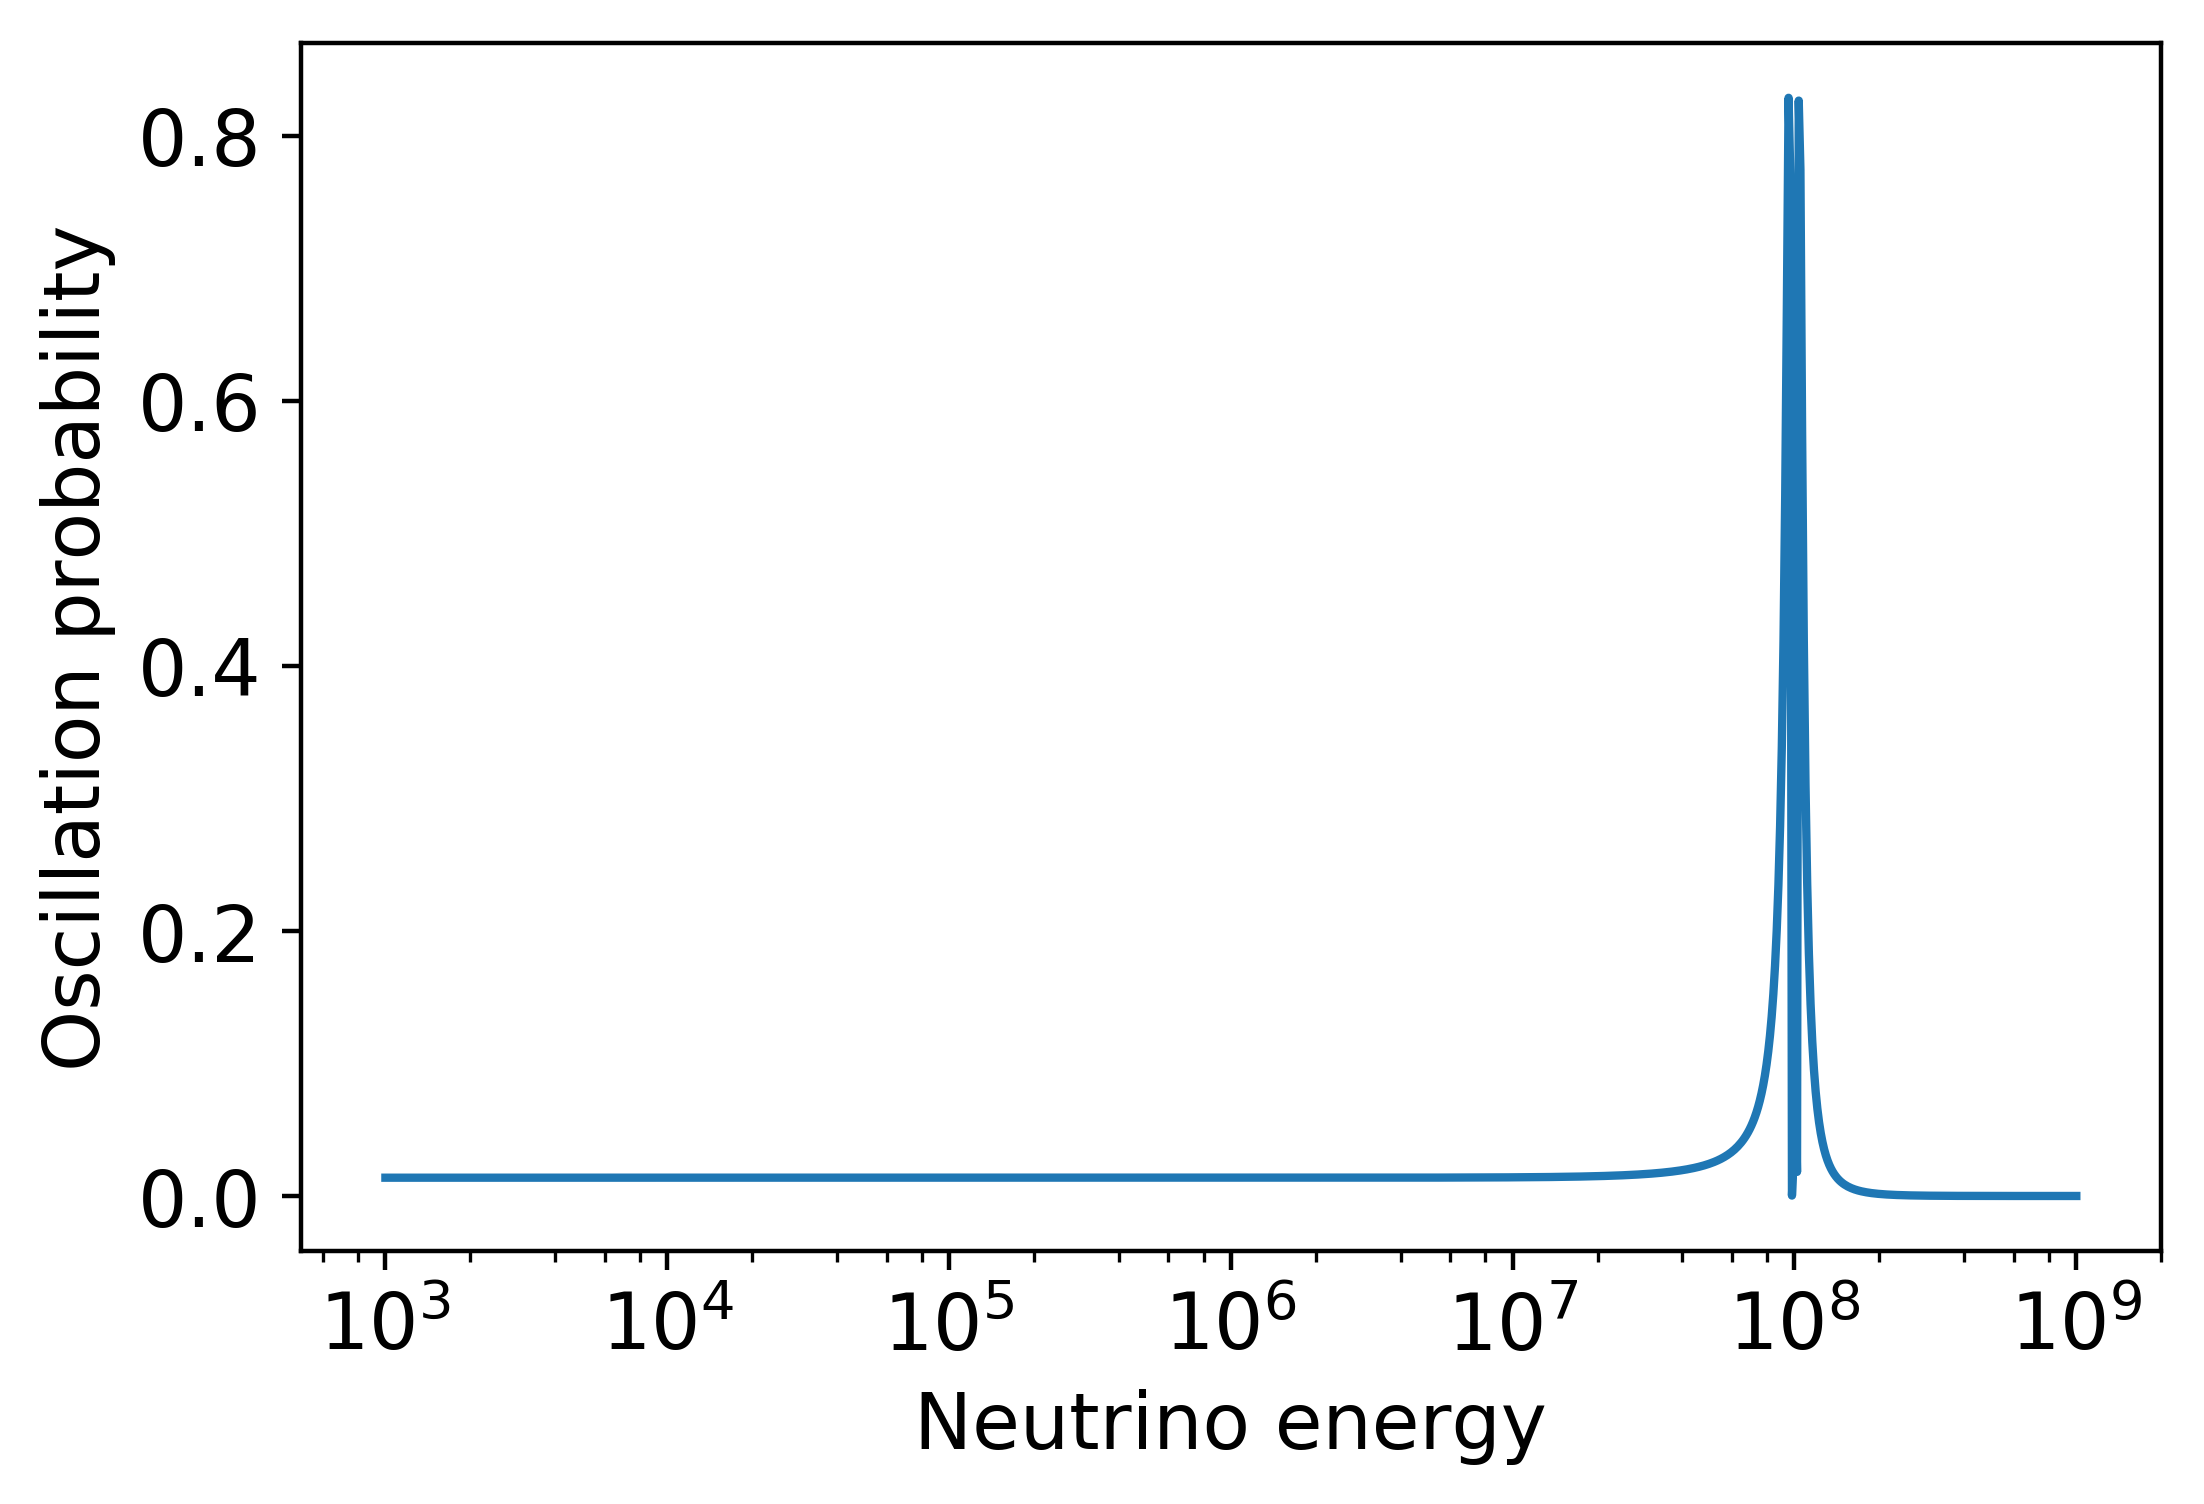

In [83]:
#Another one for playing around
vars=numpy.logspace(3,9,1000)
pylab.plot(vars,OscProbYNew(500,vars,1e8,500000),label=str(i))
pylab.semilogx()
pylab.xlabel("Neutrino energy")
pylab.ylabel("Oscillation probability")


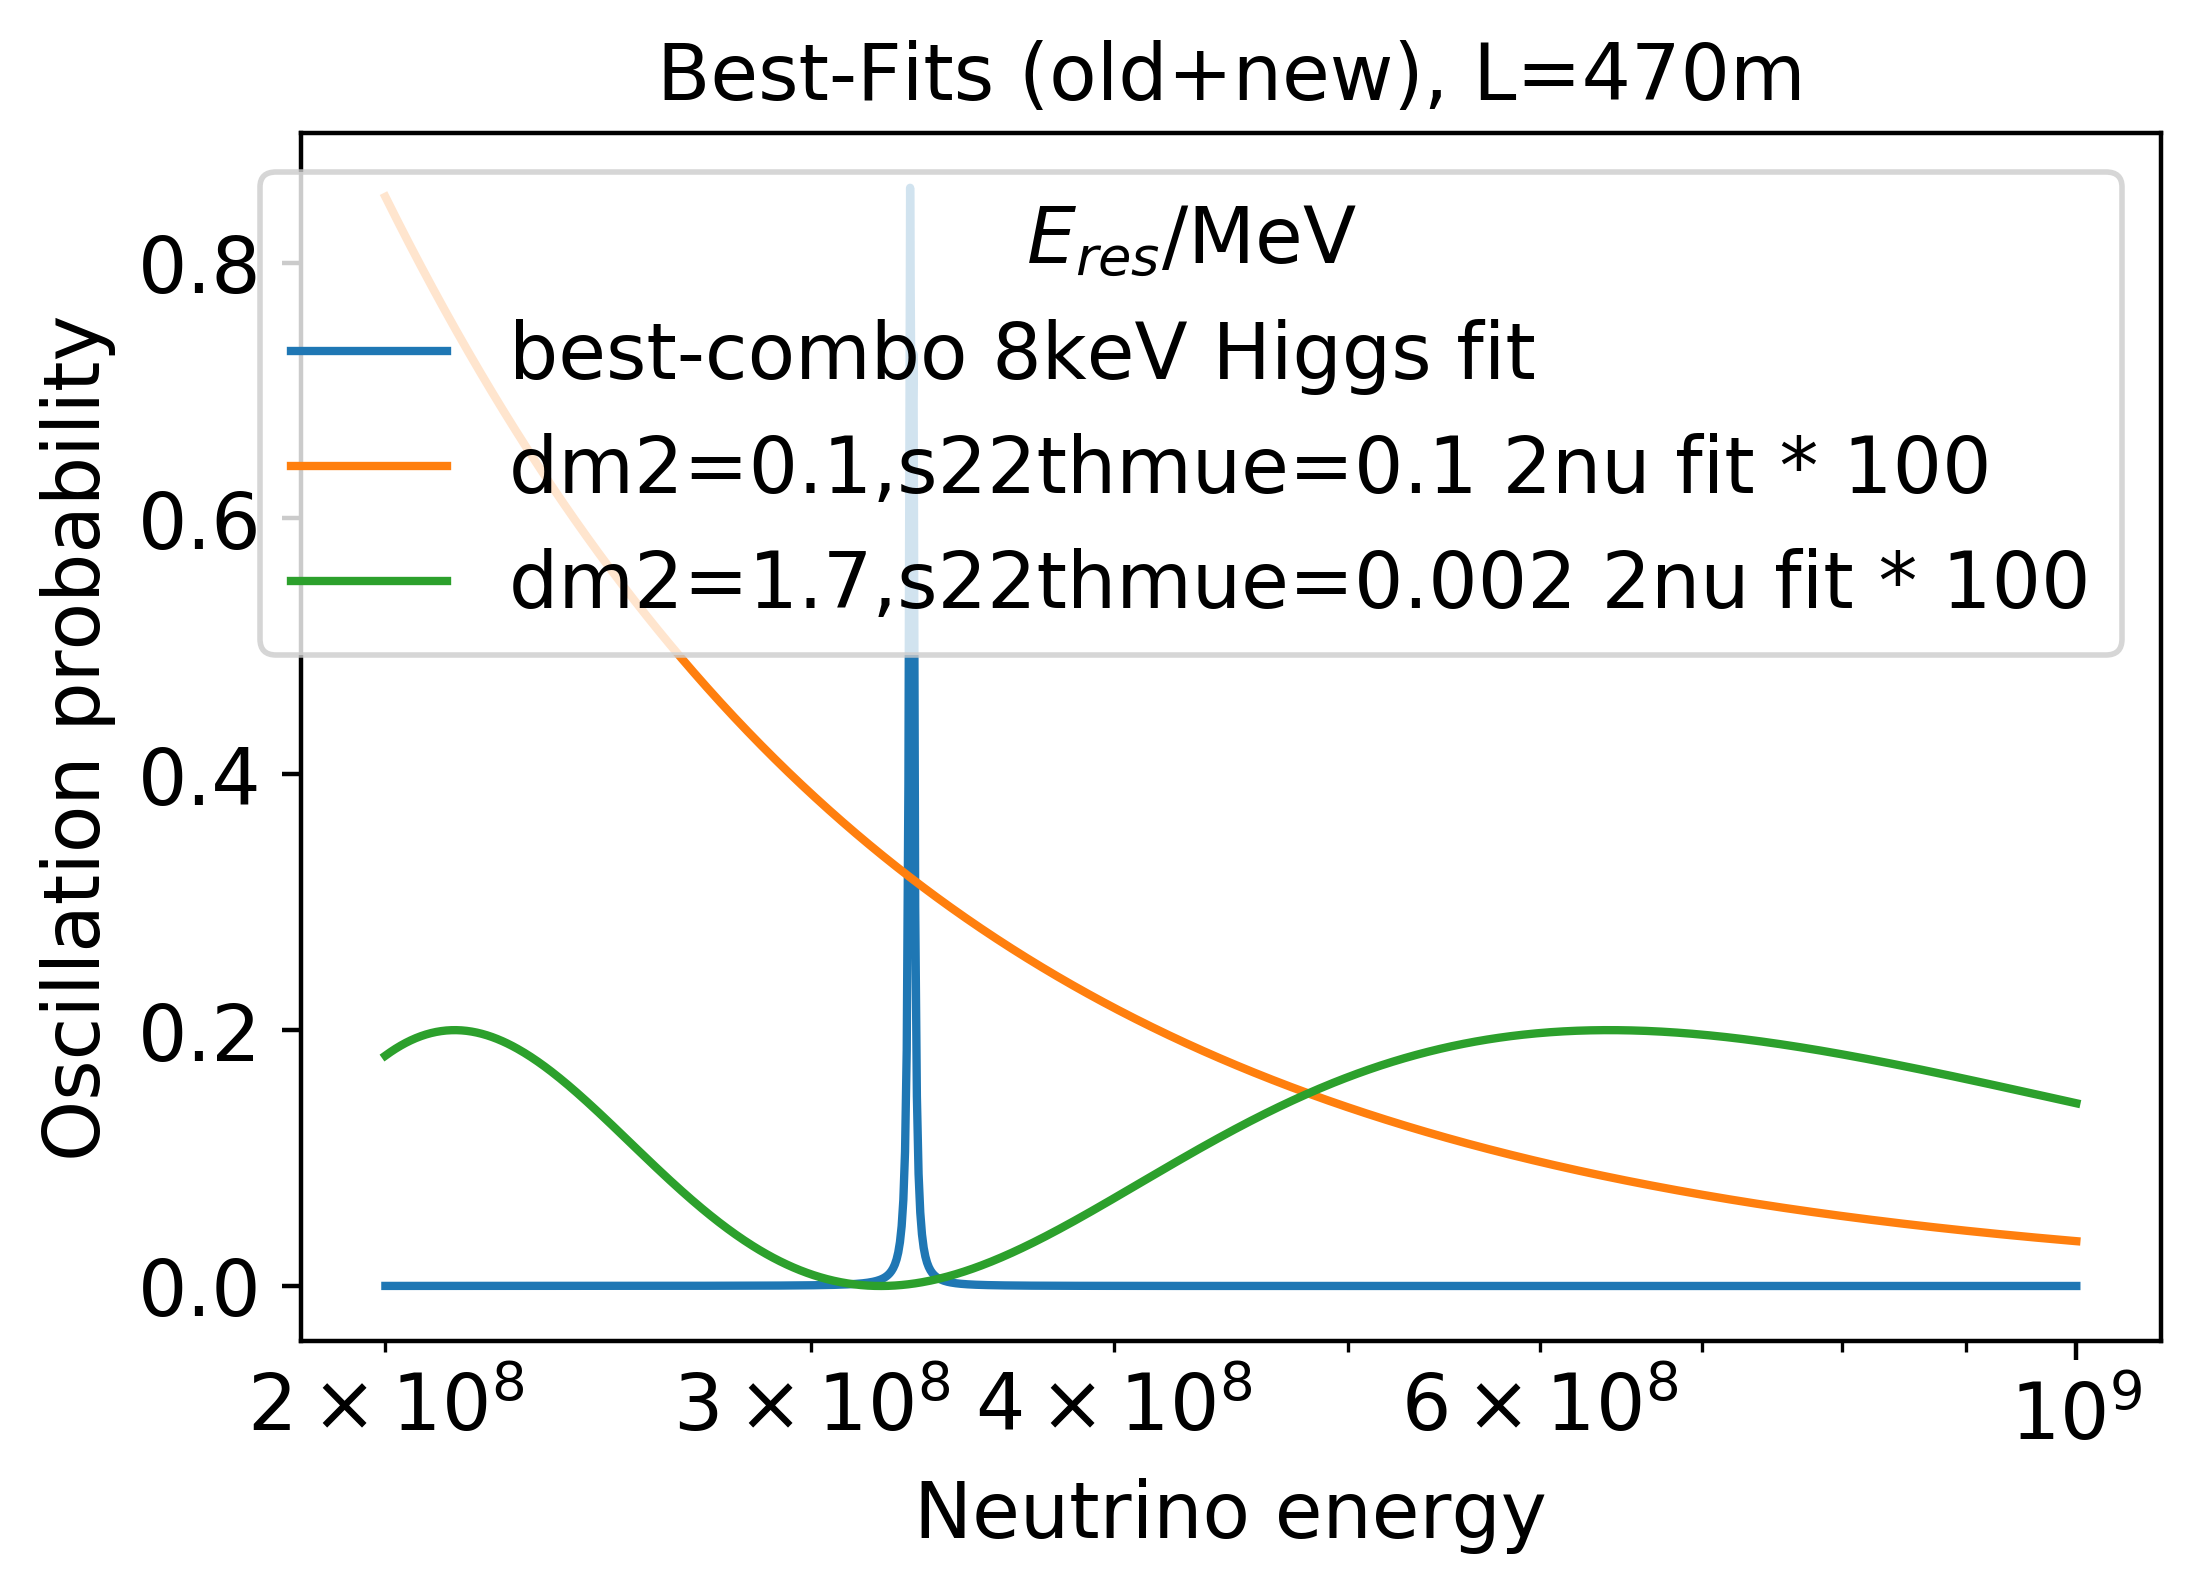

In [84]:
#Best-fit

hbarc = 197 *1E-12 * 1E6  # eV*m, from MeV*fm, which we won't even use!
vars2=numpy.logspace(numpy.log10(2E8),9,1000)
OscProb2nu=lambda L,E,dm2,s22thmue: s22thmue * numpy.sin(1.26*dm2*L/(E/1.0E6))**2  # meters and MeV

pylab.plot(vars2,OscProbYNew(470,vars2,330E6,2E5),label="best-combo 8keV Higgs fit")
pylab.plot(vars2,100*OscProb2nu(470,vars2,0.1,0.1),label="dm2=0.1,s22thmue=0.1 2nu fit * 100 ")
pylab.plot(vars2,100*OscProb2nu(470,vars2,1.7,0.002),label="dm2=1.7,s22thmue=0.002 2nu fit * 100")
pylab.legend(title=r"$E_{res}$/MeV",fontsize=14)
pylab.semilogx()
pylab.xlabel("Neutrino energy")
pylab.ylabel("Oscillation probability")
pylab.title(r"Best-Fits (old+new), L=470m",fontsize=14)
pylab.savefig("New+Old_oscns.png",dpi=200)
pylab.show()


In [85]:
#Load MiniBooNE data
MBBinEdges=numpy.loadtxt("MBData/miniboone_binboundaries_nue_lowe.txt")
MBCounts=numpy.loadtxt("MBData/miniboone_nuedata_lowe.txt")
MBBackground=numpy.loadtxt("MBData/miniboone_nuebgr_lowe.txt")
MBSimEvents=numpy.loadtxt("MBData/miniboone_numunuefullosc_ntuple.txt")

MBCounts_an=numpy.loadtxt("MBData/miniboone_nuebardata_lowe.txt")
MBBackground_an=numpy.loadtxt("MBData/miniboone_nuebarbgr_lowe.txt")
MBSimEvents_an=numpy.loadtxt("MBData/miniboone_numubarnuebarfullosc_ntuple.txt")


In [109]:
#Make plots of the oscillated spectrum from Yi/mi and E_res
def DrawMBOscillated(YiMi,Eres,BinEdge,MBSim,MBBack,MBData,FileName=""):
    NewWeight=[]
    for i in MBSim:
        NewWeight.append(OscProbYNew(i[2]/1e2,i[1]*1e6,Eres,YiMi))
    BGCenters=(BinEdge[:-1]+BinEdge[1:])/2
    HistX=  [BGCenters,MBSim[:,0]]
    HistWts=[MBBack,MBSim[:,3]*numpy.array(NewWeight)/float(len(MBSim))]
    pylab.figure(figsize=(6,6),dpi=400)
    pylab.hist(HistX,weights=HistWts,bins=BinEdge,stacked=True,rwidth=1,alpha=0.5,label=["MB Background","Best-Fit Excess"])
    pylab.errorbar((BinEdge[:-1]+BinEdge[1:])/2,MBData,yerr=pow(MBData,0.5),xerr=(BinEdge[1:]-BinEdge[:-1])/2,color='black',linewidth=2,label='Data',linestyle='none')
    pylab.legend(loc='upper right')
    pylab.xlim(0,3000)
    pylab.xlabel("Energy / MeV")
    pylab.ylabel("Count / MeV")
    pylab.tight_layout()

    if(FileName!=""):
        pylab.savefig(FileName,dpi=200,bbox_inches=0)
    pylab.show()
    
    
#Get chi2 between data and model for oscillated spectrum from Yi/mi and E_res
def Chi2MBOscillated(YiMi,Eres,BinEdge,MBSim,MBBack,MBData):
    NewWeight=[]
    for i in MBSim:
        NewWeight.append(OscProbYNew(i[2]/1e2,i[1]*1e6,Eres,YiMi))
    BGCenters=(BinEdge[:-1]+BinEdge[1:])/2
    h1=numpy.histogram(MBSim[:,0],weights=MBSim[:,3]*numpy.array(NewWeight)/float(len(MBSim)),bins=BinEdge)
    return scipy.stats.chisquare(MBData,h1[0]+MBBack)[0]


In [87]:
# Get chi2 arrays over the parameter space in nu and nubar mode
#  and find minima

eres = numpy.arange(2e8, 5e8, 1e7)
yimi = numpy.logspace(4.5,6.5,50)
gridX, gridY = numpy.meshgrid(eres, yimi)

gridZNuE=[]
import pdb
for i in range(0,len(yimi)):
    gridZRow=[]
    for j in range(0,len(eres)):
        gridZRow.append(Chi2MBOscillated(yimi[i],eres[j],MBBinEdges,MBSimEvents,MBBackground,MBCounts))
    print i
    
    gridZNuE.append(gridZRow)
minZNuE=min(numpy.array(gridZNuE).flatten())


gridZNuEBar=[]
for i in range(0,len(yimi)):
    gridZRow=[]
    for j in range(0,len(eres)):
        gridZRow.append(Chi2MBOscillated(yimi[i],eres[j],MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an))
    print i
    gridZNuEBar.append(gridZRow)
minZNuEBar=min(numpy.array(gridZNuEBar).flatten())



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [106]:
#Find the best fits

minZSum=min(numpy.array(gridZNuE).flatten()+numpy.array(gridZNuEBar).flatten())
argZsum=numpy.argmin(numpy.array(gridZNuE).flatten()+numpy.array(gridZNuEBar).flatten())
argZnu=numpy.argmin(numpy.array(gridZNuE).flatten())
argZnubar=numpy.argmin(numpy.array(gridZNuEBar).flatten())

minXnu=gridX.flatten()[argZnu]
minYnu=gridY.flatten()[argZnu]
minXnubar=gridX.flatten()[argZnubar]
minYnubar=gridY.flatten()[argZnubar]
minXboth=gridX.flatten()[argZsum]
minYboth=gridY.flatten()[argZsum]



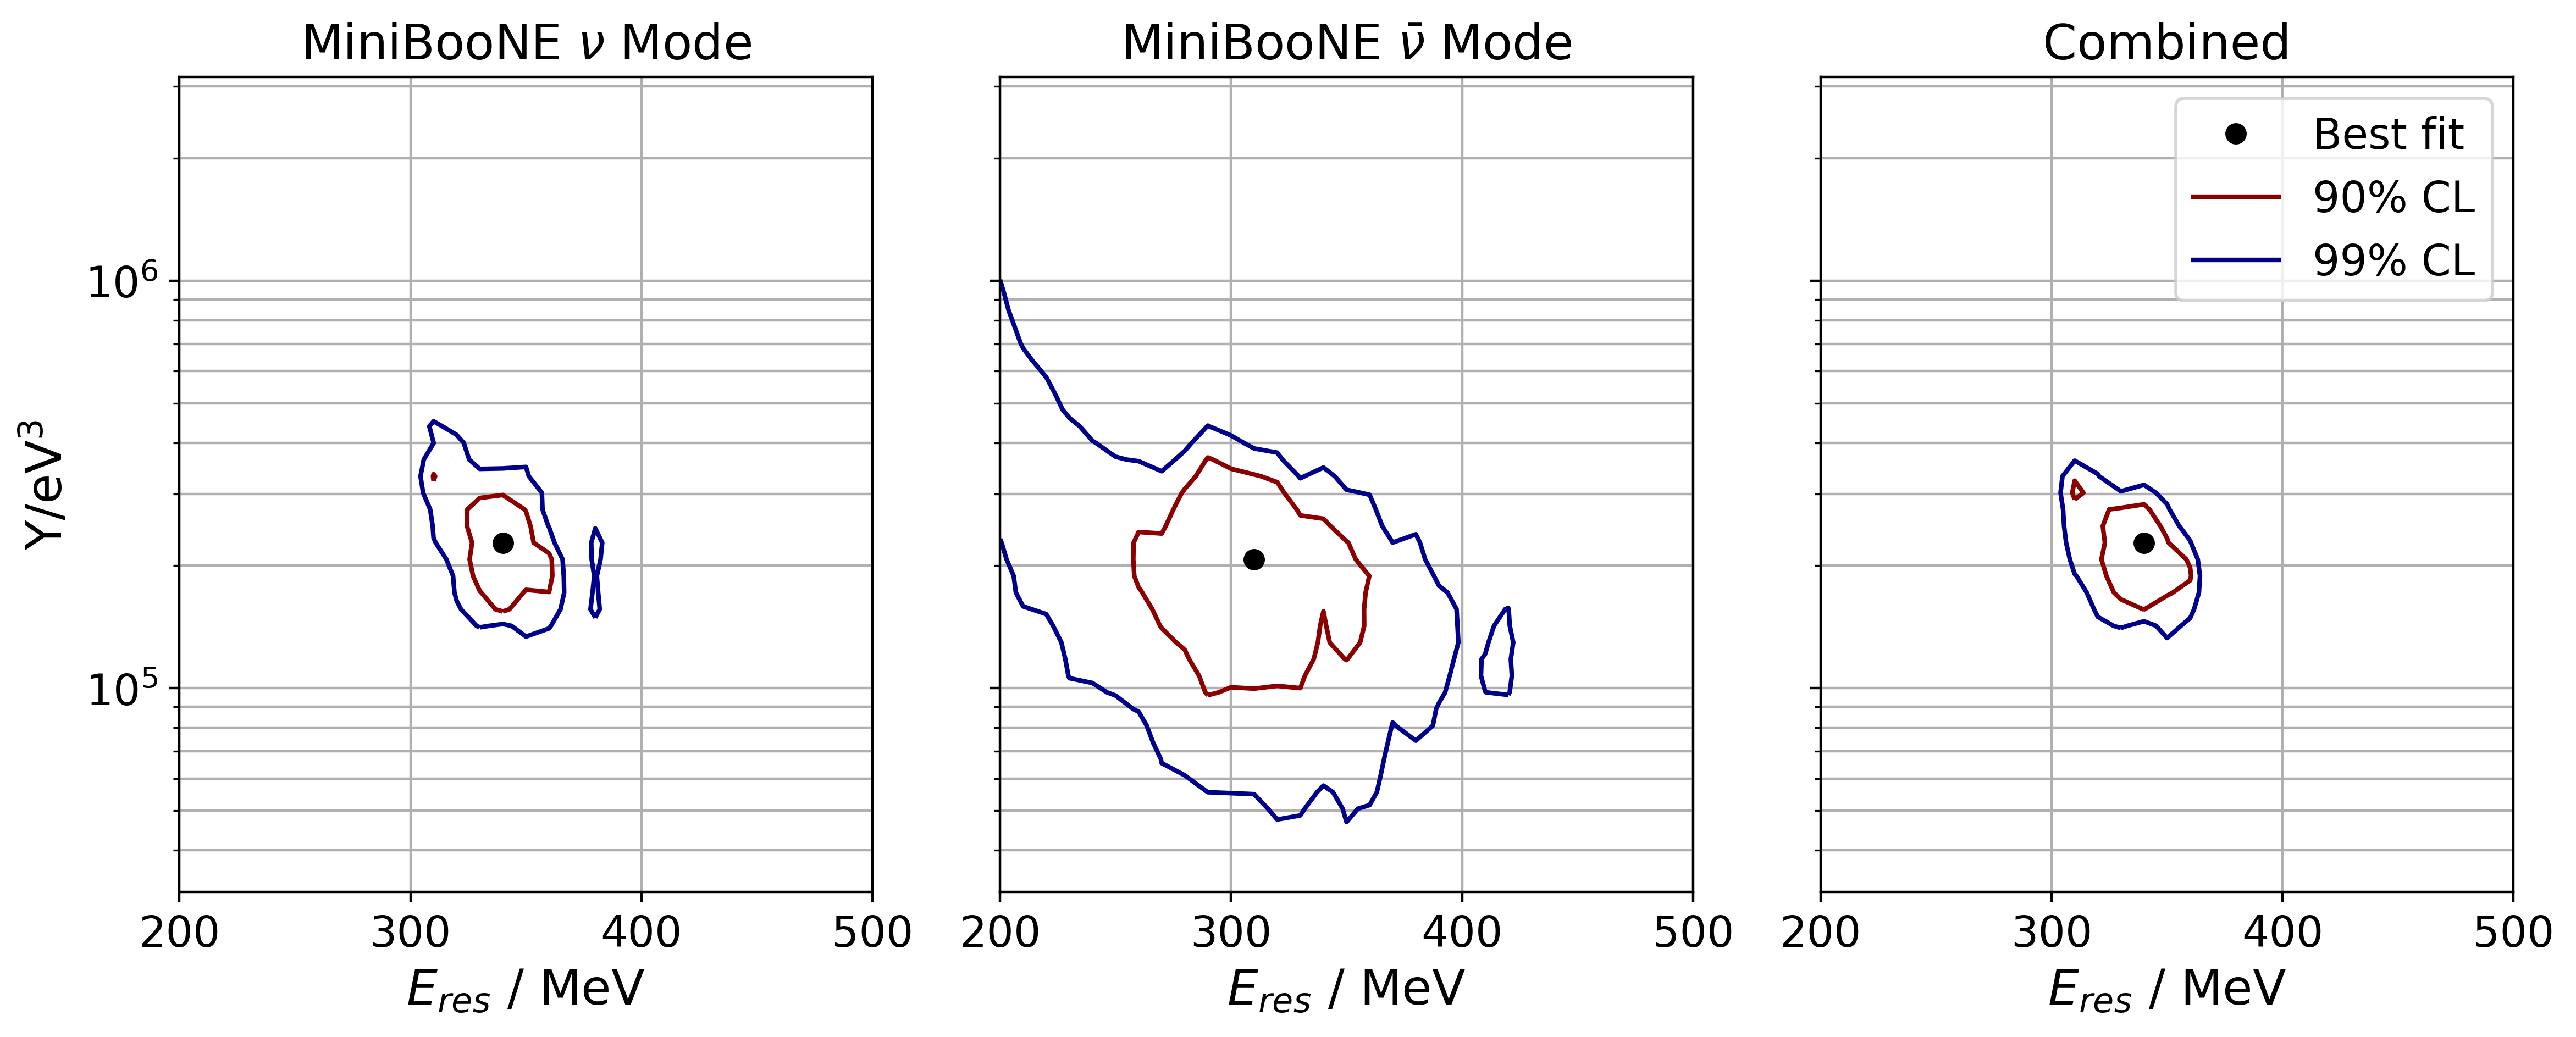

In [107]:
#Plot confidence intervals based on Wilks theorem for different samples

Cols=['DarkRed','DarkBlue']

f, (ax1, ax2, ax3) =pylab.subplots(1,3,sharex=True, sharey=True,figsize=(12,5))
f.subplots_adjust(wspace=0)


CS = ax1.contour(gridX/1e6, gridY, gridZNuE-minZNuE,levels=[4.6,9.21],colors=Cols)
ax1.plot(minXnu/1e6,minYnu,'o',color='black',label='Best fit')
ax1.plot([0,0],[0,0],color=Cols[0],label='90% CL')
ax1.plot([0,0],[0,0],color=Cols[1],label='99% CL')
ax1.set_xlim(200,500)
ax1.semilogy()
ax1.grid(which='both')
ax1.set_xlabel(r"$E_{res}$ / MeV",fontsize=16)
ax1.set_ylabel(r"Y/eV$^3$",fontsize=16)
ax1.set_title(r"MiniBooNE $\nu$ Mode",fontsize=16)

CS = ax2.contour(gridX/1e6, gridY, gridZNuEBar-minZNuEBar,levels=[4.6,9.21],colors=Cols)
ax2.grid(which='both')
ax2.plot(minXnubar/1e6,minYnubar,'o',color='black',label='Best fit')
ax2.plot([0,0],[0,0],color=Cols[0],label='90% CL')
ax2.plot([0,0],[0,0],color=Cols[1],label='99% CL')
ax2.set_xlim(200,500)
ax2.semilogy()
ax2.set_xlabel(r"$E_{res}$ / MeV",fontsize=16)
ax2.set_title(r"MiniBooNE $\bar{\nu}$ Mode",fontsize=16)


CS = ax3.contour(gridX/1e6, gridY, numpy.array(gridZNuEBar)+numpy.array(gridZNuE)-minZSum,levels=[4.6,9.21],colors=Cols)
ax3.grid(which='both')
ax3.plot(minXboth/1e6,minYboth,'o',color='black',label='Best fit')
ax3.plot([0,0],[0,0],color=Cols[0],label='90% CL')
ax3.plot([0,0],[0,0],color=Cols[1],label='99% CL')
ax3.set_xlim(200,500)
ax3.semilogy()
ax3.legend(loc='upper right',fontsize=14)
ax3.set_xlabel(r"$E_{res}$ / MeV",fontsize=16)
ax3.set_title(r"Combined",fontsize=16)
f.subplots_adjust(wspace=0)

pylab.tight_layout()
pylab.savefig("FitPlots.png",dpi=200,bbox_inches=0)

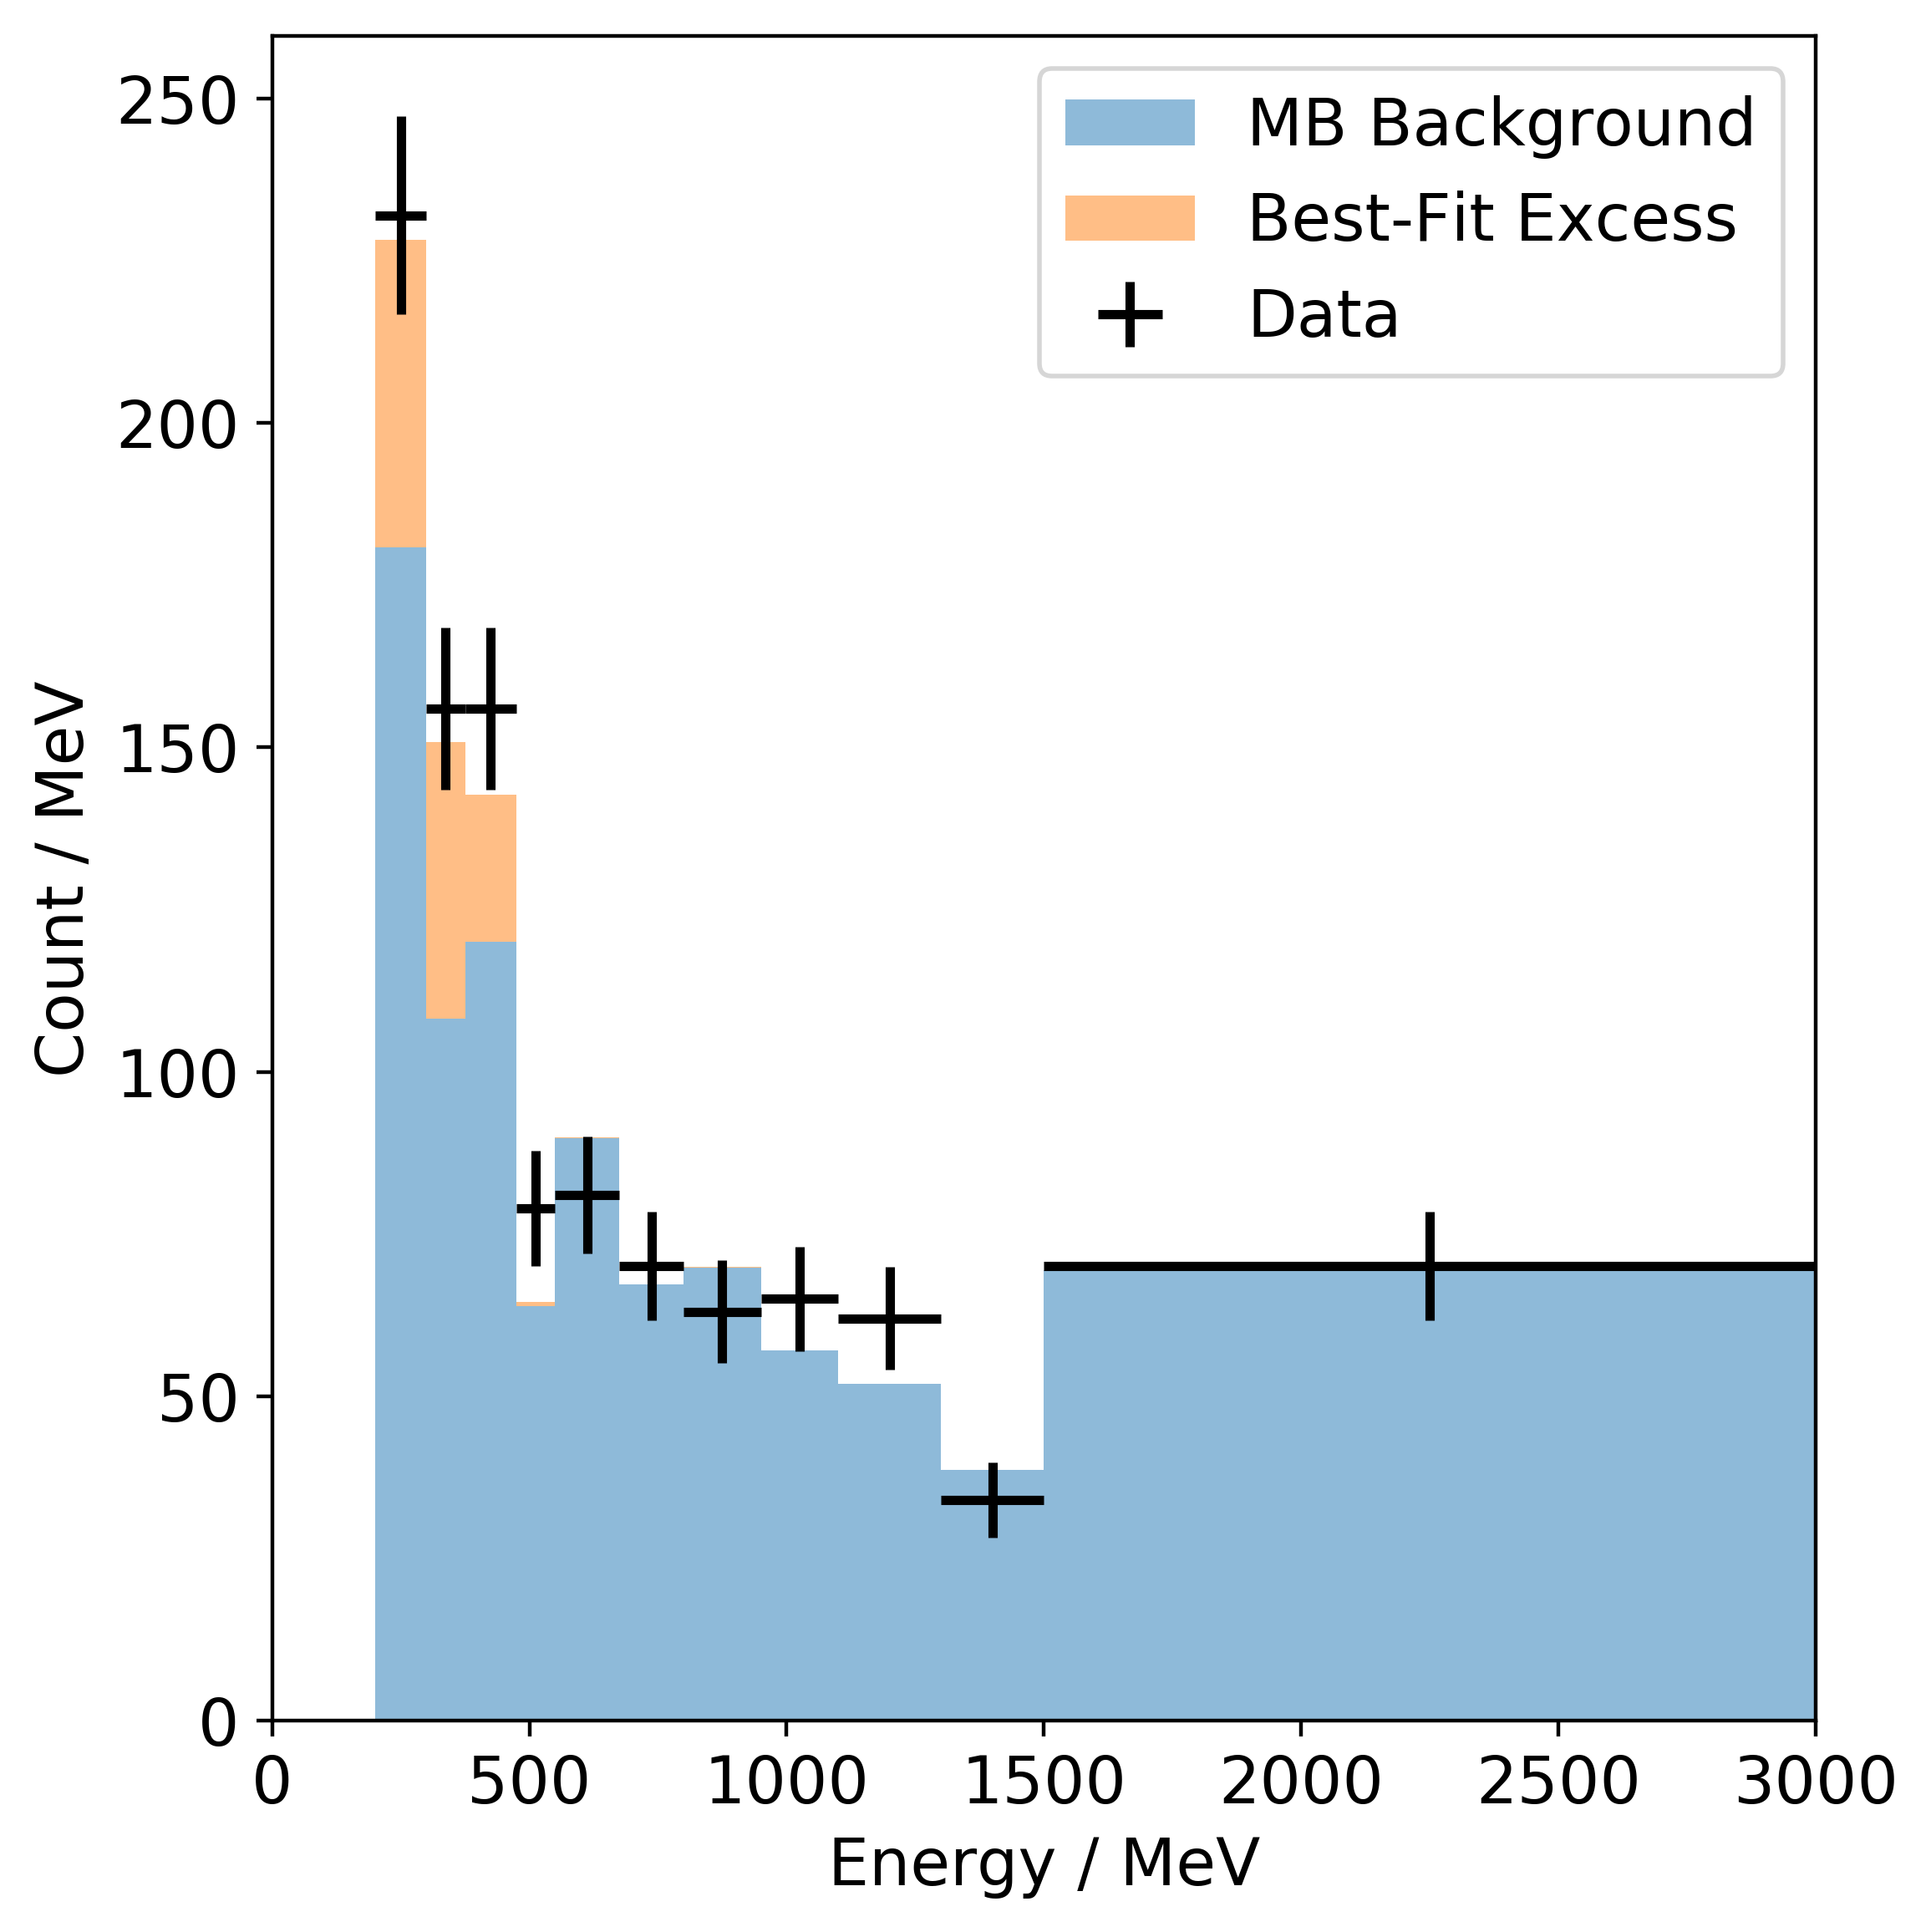

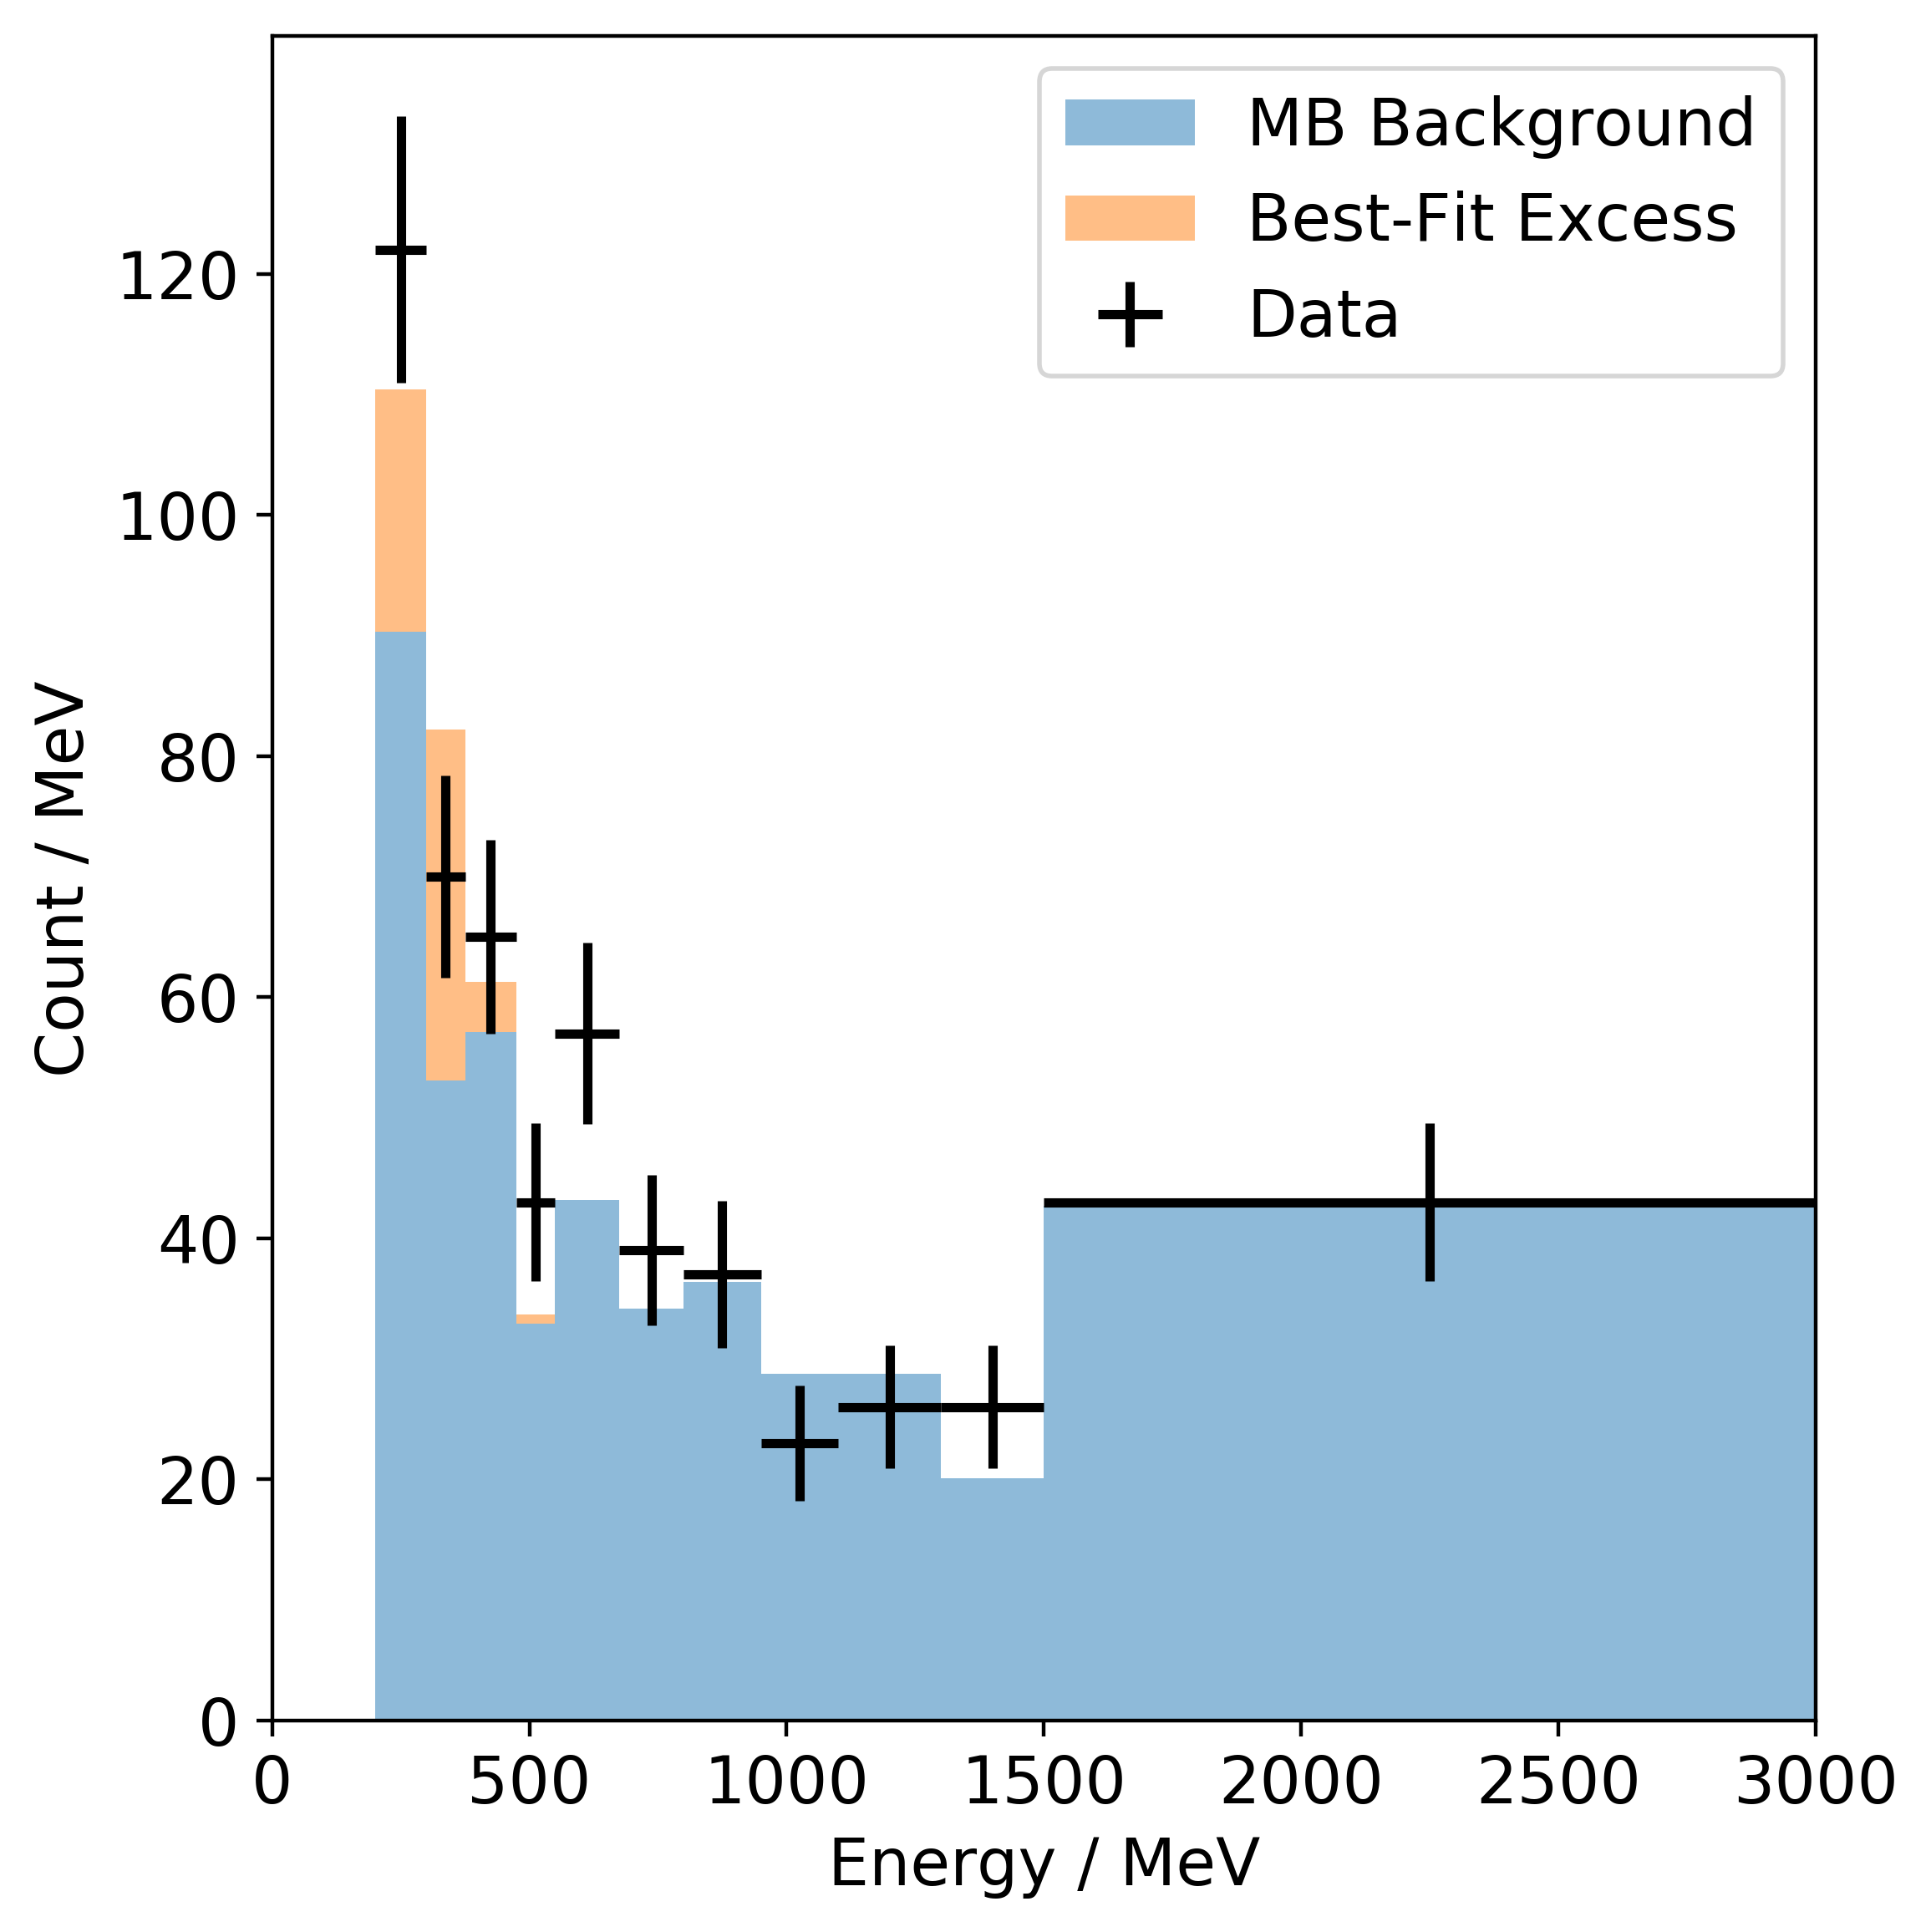

In [110]:
#Plot best fit points

#Nu Mode combined best fit
DrawMBOscillated(2e5,3.3e8,MBBinEdges,MBSimEvents,MBBackground,MBCounts,"nue_2e5_33e8.png")

#NuBar Mode combined best fit
DrawMBOscillated(2e5,3.3e8,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an,"nuebar_2e5_33e8.png")

In [69]:
# Print out the Chi2s
print "Neutrino Null:", Chi2MBOscillated(0,0,MBBinEdges,MBSimEvents,MBBackground,MBCounts)
print "Antineutrino Null:", Chi2MBOscillated(0,0,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an)
print "Neutrino BF:", minZNuE
print "AntiNeutrino BF:", minZNuEBar
print "Both BF:",minZSum

print MBCounts, MBCounts_an


Neutrino Null: 55.2466949178
Antineutrino Null: 28.9736859717
Neutrino BF: 6.42668288166
AntiNeutrino BF: 11.7182985827
Both BF: 21.8945094527
[ 232.  156.  156.   79.   81.   70.   63.   65.   62.   34.   70.] [ 122.   70.   65.   43.   57.   39.   37.   23.   26.   26.   43.]
